In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Policy Evaluation

For this project, we want to implement the policy evaluation algorithm. We will implement the two kind of policy evaluation: the Two-Array version and the In-Place versions.

We are giving a policy and the goal is to compute the state-value function corresponding to this policy. We will use the Bellman equation given by:

$$V^{\pi}(s) = \sum_{a \in A} \pi(a | s) \left( R(s, a) + \gamma \sum_{s' \in S} P(s' | s, a) V^{\pi}(s') \right).$$

We use a 4x4 GridWorld environment as the formalize the problem as an MDPs as follows:

1. The states are just the cells the agent is currently in
2. The actions are the cardinal direction and each action the probability $\frac{1}{4}$ to be sample.
3. Rewards of -1 on all transitions
4. Given $a \in A$ and $s' \text{ and } s \in S$, $P(s' | s, a) = 1$

In [2]:
class PolicyEvaluation:
    
    def __init__(self):
        
        self.number_row = 4
        self.number_column = 4
        
    # Function for computing the value function at a specific state "S"
    def compute_a_value_at_a_state(self, actual_state, Matrix, discount_factor):
        
        self.discount_factor = discount_factor
        a = actual_state[0]
        b = actual_state[1]
        reward = -1.0
        new_value_at_state = 0.0
        
        if a==0 and b==0:
            new_value_at_state = 0
            
        elif a==0 and b==self.number_column-1:
            new_value_at_state = .25*((reward + discount_factor*Matrix[a,b-1]) +
                             (reward + discount_factor*Matrix[a+1,b]) +
                                     (reward + discount_factor*Matrix[a,b]) +
                                     (reward + discount_factor*Matrix[a,b]))
        elif a==self.number_row-1 and b==0:
            new_value_at_state = .25*((reward + discount_factor*Matrix[a-1,b]) + 
                             (reward + discount_factor*Matrix[a,b+1])+
                                     (reward + discount_factor*Matrix[a,b])+
                                     (reward + discount_factor*Matrix[a,b]))
        elif a==self.number_row-1 and b==self.number_column-1:
            new_value_at_state = .25*((reward + discount_factor*Matrix[a-1,b]) + 
                             (reward + discount_factor*Matrix[a,b-1]) +
                                     (reward + discount_factor*Matrix[a,b]) +
                                     (reward + discount_factor*Matrix[a,b]))
        elif a==0 and (b<self.number_column-1 and b>0):
            new_value_at_state = .25*((reward + discount_factor*Matrix[a,b-1]) + 
                             (reward + discount_factor*Matrix[a,b+1])+
                              (reward + discount_factor*Matrix[a+1,b]) +
                                     (reward + discount_factor*Matrix[a,b]))
        elif a==self.number_row-1 and (b<self.number_column-1 and b>0):
            new_value_at_state = .25*((reward + discount_factor*Matrix[a,b-1]) + 
                             (reward + discount_factor*Matrix[a,b+1])+
                              (reward + discount_factor*Matrix[a-1,b])+
                                     (reward + discount_factor*Matrix[a,b]))
        elif b==0 and (a<self.number_row-1 and a>0):
            new_value_at_state = .25*((reward + discount_factor*Matrix[a-1,b]) + 
                             (reward + discount_factor*Matrix[a+1,b])+
                              (reward + discount_factor*Matrix[a,b+1])+
                                     (reward + discount_factor*Matrix[a,b]))
        elif b==self.number_column-1 and (a<self.number_row-1 and a>0):
            new_value_at_state = .25*((reward + discount_factor*Matrix[a-1,b]) + 
                             (reward + discount_factor*Matrix[a+1,b])+
                              (reward + discount_factor*Matrix[a,b-1])+
                                     (reward + discount_factor*Matrix[a,b]))
        else:
            new_value_at_state = .25*((reward + discount_factor*Matrix[a,b+1]) + 
                             (reward + discount_factor*Matrix[a,b-1])+
                               (reward + discount_factor*Matrix[a+1,b])+
                              (reward + discount_factor*Matrix[a-1,b]))
            
        return new_value_at_state
    
    
    # Two Arrays Version
    def twoVersion(self, theta, discount_factor):
        
        self.theta = theta
        self.discount_factor = discount_factor
        self.grid_two_v = np.zeros((4,4))
        copy_grid_two_v = self.grid_two_v.copy()
        
        iterations = 0
        
        while True:
            delta = 0
            for i in range(self.grid_two_v.shape[0]):
                for j in range(self.grid_two_v.shape[1]):
                    self.grid_two_v[i,j] = self.compute_a_value_at_a_state([i,j], copy_grid_two_v, self.discount_factor)
            
            delta = max(delta, abs(copy_grid_two_v - self.grid_two_v).max())
            copy_grid_two_v = self.grid_two_v.copy()
            
            iterations += 1
            
            if delta < self.theta:
                break
                
        return iterations, self.grid_two_v
    
    # In Person Version
    def InPersonVersion(self, theta, discount_factor):
        
        self.theta = theta
        self.discount_factor = discount_factor
        self.grid_in_person = np.zeros((4,4))
        
        iterations = 0
        
        while True:
            
            delta = 0
            previous_value = self.grid_in_person.copy()
            for i in range(self.grid_in_person.shape[0]):
                for j in range(self.grid_in_person.shape[1]):
                    
                    self.grid_in_person[i,j] = self.compute_a_value_at_a_state([i,j], self.grid_in_person,
                                                                               self.discount_factor)
            
            delta = max(delta, abs(previous_value - self.grid_in_person).max())
            
            iterations += 1
            
            if delta < self.theta:
                break
                
        return iterations, self.grid_in_person

### A 2D heatmap plot of the value function for 𝛾=1

In [3]:
twoArray1 = PolicyEvaluation()
iteration1, value_function1 = twoArray1.twoVersion(0.01, 1.0)
print("The number of iterations for the Two Array Version is :",iteration1,"\n\n The Value function is :\n", value_function1)

The number of iterations for the Two Array Version is : 241 

 The Value function is :
 [[  0.         -29.76732433 -44.78495492 -51.29956879]
 [-29.76732433 -40.53545555 -49.31633219 -53.84704529]
 [-44.78495492 -49.31633219 -54.12940727 -56.95999548]
 [-51.29956879 -53.84704529 -56.95999548 -58.94066433]]


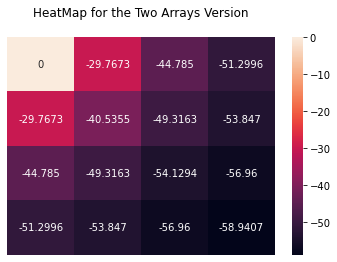

In [4]:
# In this part, we plot the first heatmap for the Two Arrays Version

sns.heatmap(value_function1, annot=True, fmt="g")
plt.title("HeatMap for the Two Arrays Version\n")
plt.axis("off")
plt.show()

In [5]:
InPerson = PolicyEvaluation()
iteration2, value_function2 = InPerson.InPersonVersion(0.01, 1.0)
print("The number of iterations for the In Person Version is :",iteration2,"\n\n The Value function is :\n", value_function2)

The number of iterations for the In Person Version is : 165 

 The Value function is :
 [[  0.         -29.84501687 -44.90708432 -51.44282778]
 [-29.84501687 -40.64743591 -49.45815968 -54.00526824]
 [-44.90708432 -49.45815968 -54.29103511 -57.13347875]
 [-51.44282778 -54.00526824 -57.13347875 -59.12358991]]


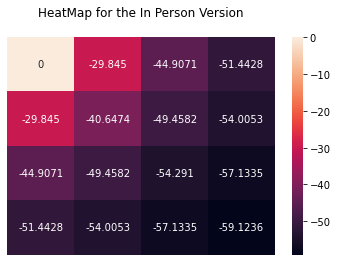

In [6]:
# In this part, we plot the first heatmap for the In Person Version

sns.heatmap(value_function2, annot=True, fmt="g")
plt.title("HeatMap for the In Person Version\n")
plt.axis("off")
plt.show()

### A combined plot of both versions of policy evaluation for different discount rates

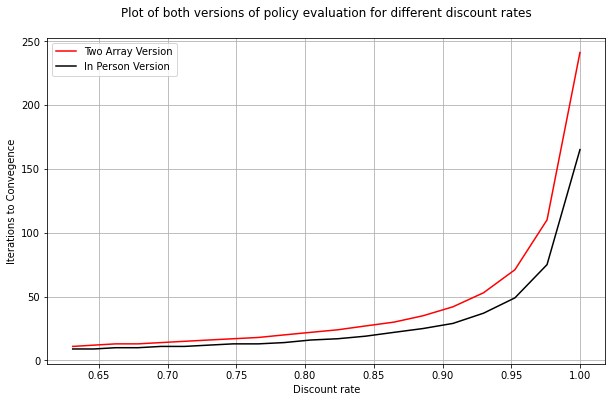

In [7]:
Discount_Two_Array_Version = np.logspace(-0.2, 0, num = 20)
Iteration_Two_Array_Version = []
Iteration_In_Person_Version = []

for discount in Discount_Two_Array_Version:
    iteration, _ = twoArray1.twoVersion(0.01, discount)
    iteration1, _ = InPerson.InPersonVersion(0.01, discount)
    Iteration_Two_Array_Version.append(iteration)
    Iteration_In_Person_Version.append(iteration1)

plt.figure(figsize=(10,6))
plt.plot(Discount_Two_Array_Version, Iteration_Two_Array_Version, color="r", label="Two Array Version")
plt.plot(Discount_Two_Array_Version, Iteration_In_Person_Version, color="k", label="In Person Version")
plt.title("Plot of both versions of policy evaluation for different discount rates\n")
plt.legend()
plt.grid(True)
plt.xlabel("Discount rate")
plt.ylabel("Iterations to Convegence")
plt.show()